# Tarea S13 Arias Carlos y Sanabria Hans

## 1.1 Simulación del modelo de Ising

### Generacion de los arreglos

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def Generacion(N, tipo):
    """
    N: La longitud del arreglo de espines
    tipo: Si el array esta ordenado para arriba, abajo o aleatoriamente
    Return: El array de espines
    """
    arreglo=np.ones(N)
    if tipo==1:
        return arreglo/2
    elif tipo==2:
        return -arreglo/2
    else:
        comparacion=np.random.randint(0,20,size=N)
        for i in range(N):
            if comparacion[i]%2!=0:
                arreglo[i]=-arreglo[i]
        return arreglo/2


### Calculo de las energias

In [47]:

def CalcEnergia(arreglo):
    """
    arreglo: Array de los espines
    Return: escalar de la energia del sistema 
    """
    J=1
    nEspines=len(arreglo)
    energia=0
    for i in range(nEspines):
        if i<nEspines-1:
            energia+=-J*arreglo[i]*arreglo[i+1]
        else: #Aqui se cumple la condición de periodicidad
            energia+=-J*arreglo[0]*arreglo[nEspines-1] 
    return energia

### Comparacion de energias  y transicion

In [37]:
def Transicion(arreglo, iteraciones, temperatura=1):
    """
    Arreglo: Array inicial de los spins
    iteraciones: Cantidad de veces que se repite el intento de transición
    Return: 
    Arreglo bidimensional de forma (len(arreglo), iteraciones)
    """
    matriz=np.zeros((len(arreglo), iteraciones))
    matriz[:,0]=arreglo
    
    for i in range(1,iteraciones):
        selec=np.random.randint(0,len(arreglo))
        copia=np.copy(arreglo)
        copia[selec]=-arreglo[selec]
        energia1=CalcEnergia(arreglo)
        energia2=CalcEnergia(copia)
        deltaE=energia2-energia1
        if deltaE>0:
            if np.random.random() < np.exp(-deltaE/temperatura):
                arreglo=np.copy(copia)
        else:
            arreglo=np.copy(copia)
        
        matriz[:, i]=np.copy(arreglo) #se van colocando en las columnas las
                                      #iteraciones
    return matriz

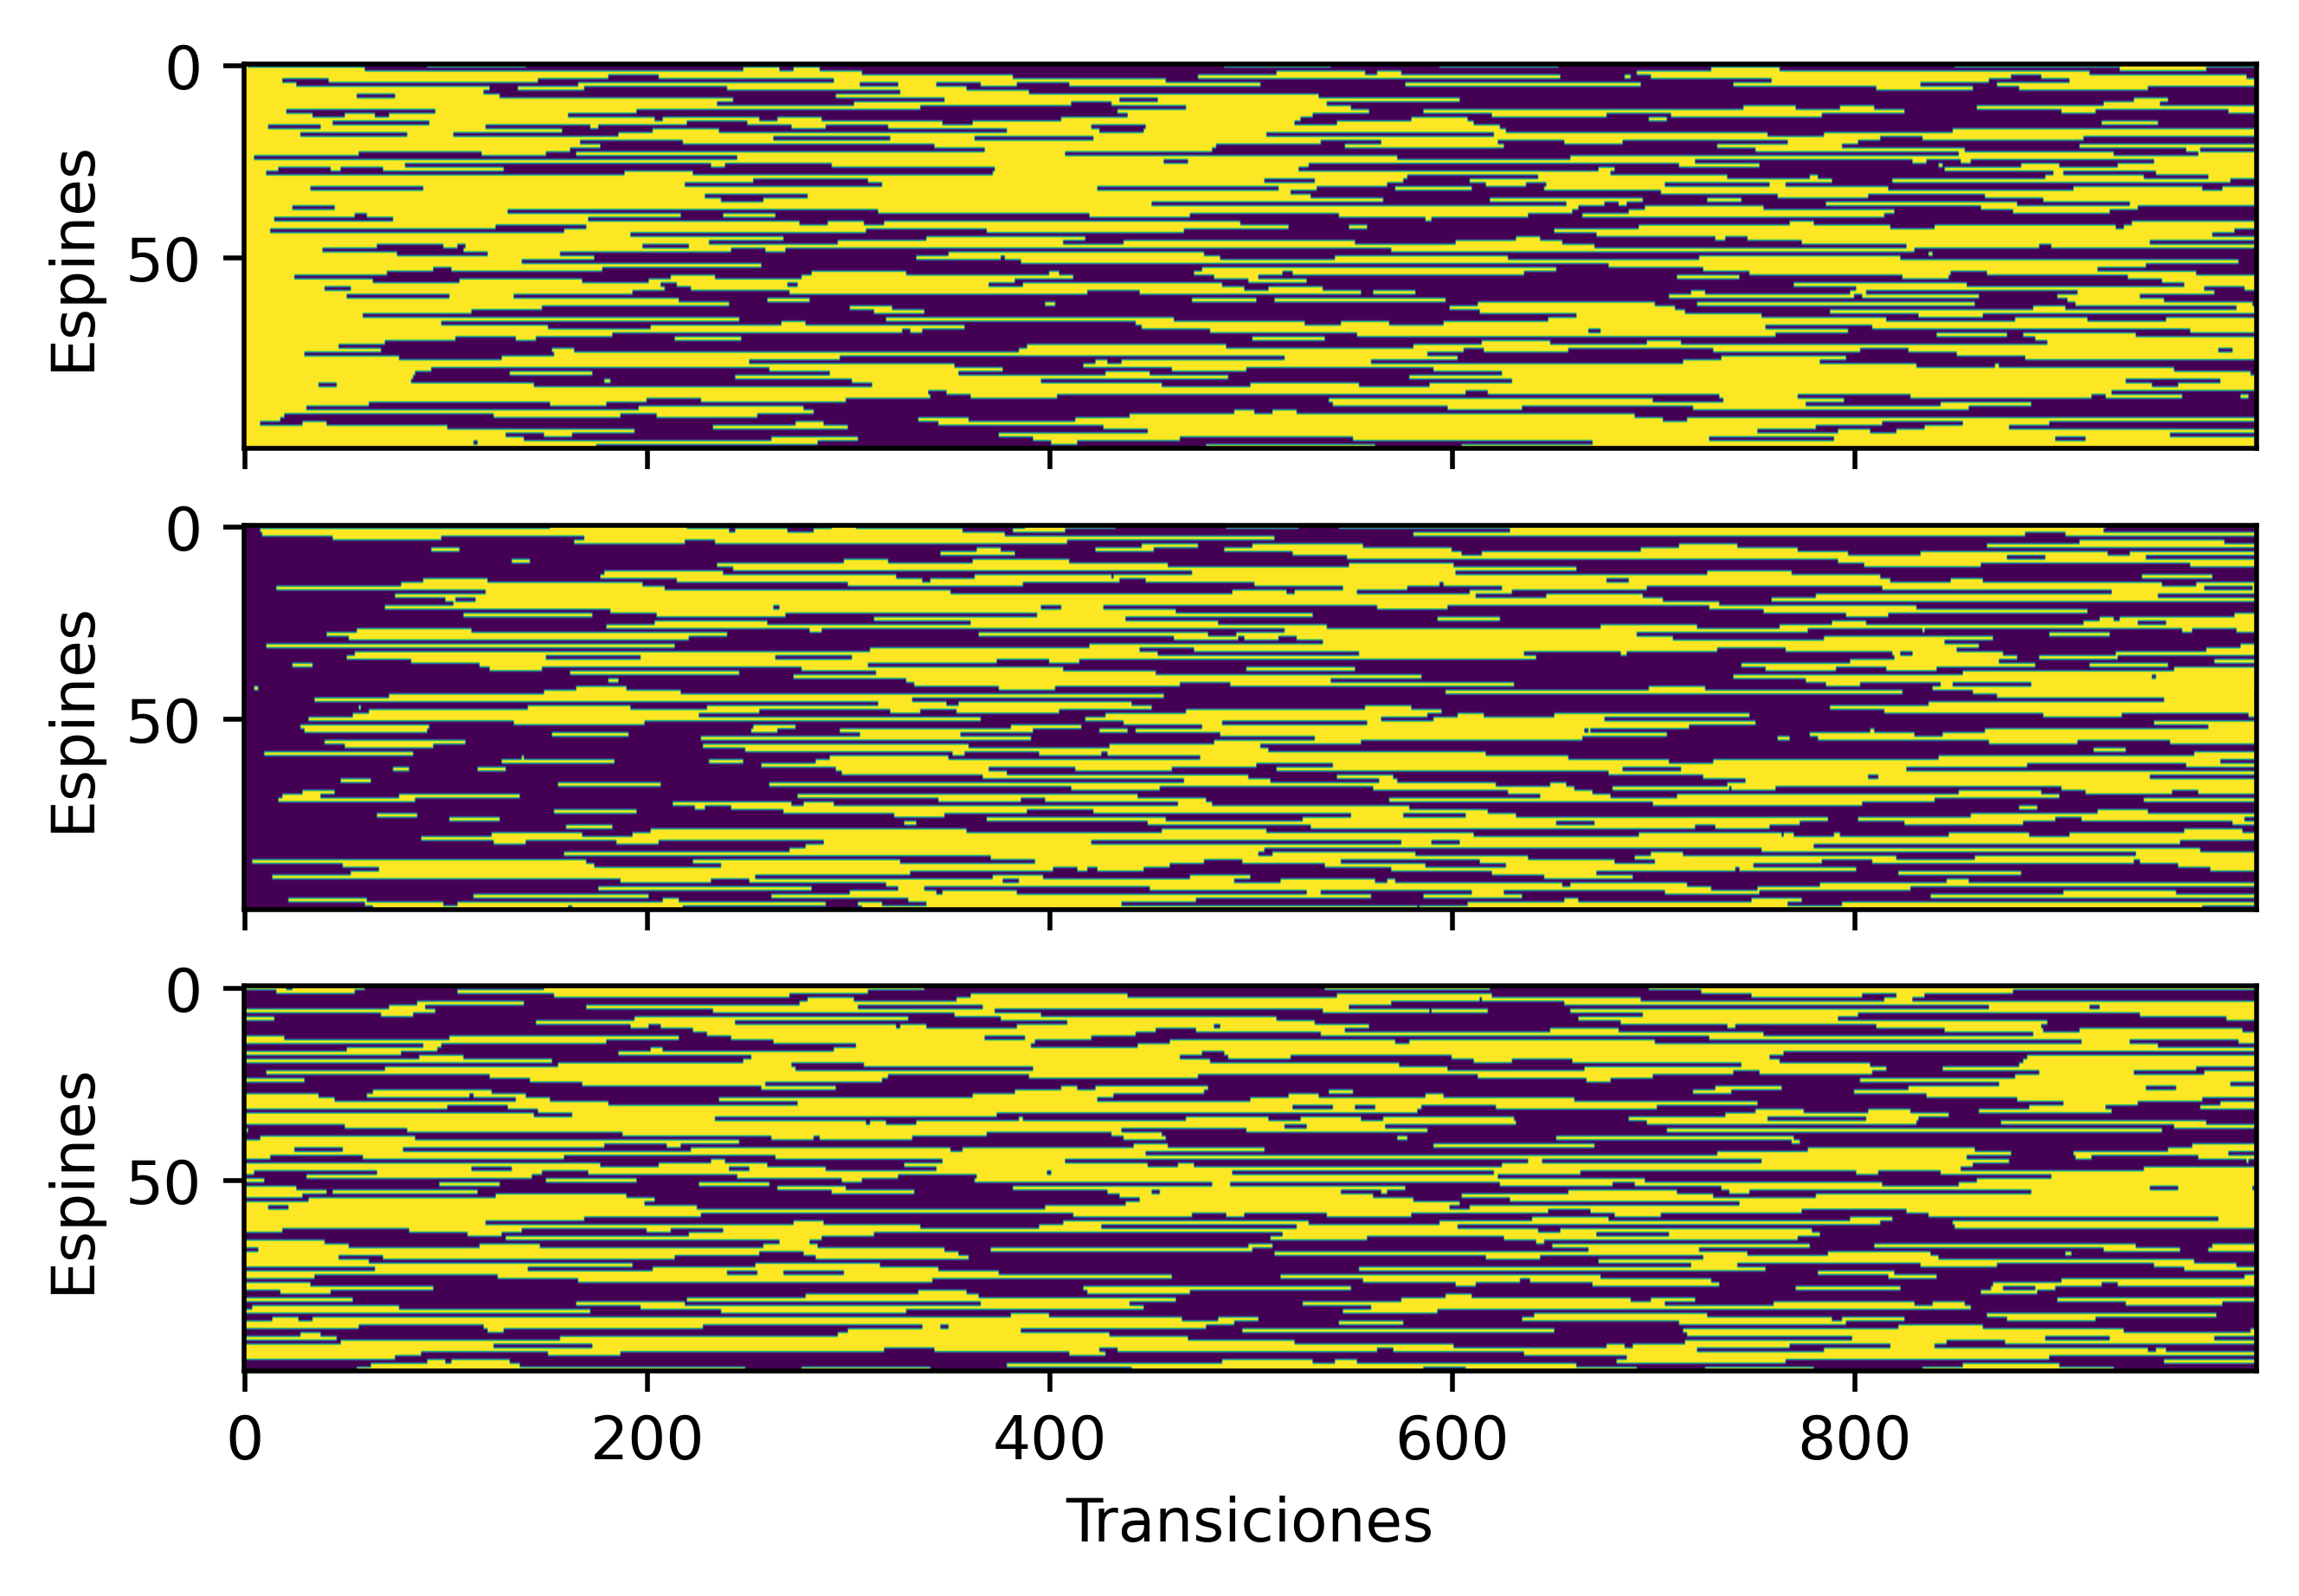

In [38]:
nEspines=100
temperatura=1

arraySpin1=Generacion(nEspines, 1)
trans1=Transicion(arraySpin1, 1000)
arraySpin2=Generacion(nEspines, 2)
trans2=Transicion(arraySpin2, 1000)
arraySpin3=Generacion(nEspines, 3)
trans3=Transicion(arraySpin3, 1000)

fig, (ax1, ax2, ax3)=plt.subplots(3,1, dpi=500, sharex=True)
ax1.imshow(trans1, aspect="auto")
ax1.set_ylabel("Espines")
ax2.imshow(trans2, aspect="auto")
ax2.set_ylabel("Espines")
ax3.imshow(trans3, aspect="auto")
ax3.set_ylabel("Espines")
ax3.set_xlabel("Transiciones")

plt.show()

## 1.2 Propiedades termodinámicas

### Magnetización, energía interna y calor especifico

In [39]:
def Magnetizacion(matriz):
    '''
    matriz: Matriz con el estado de los espines en cada iteracion
    return: Arreglo unidemnsional con la mangetizacion en cada iteracion
    '''
    
    magnet=np.sum(matriz[:,500:], axis=0) #Se supone que a partir de 500 ya esta en equilibrio
    #La suma se hace sobre las columnas, para la magnetización en cada transición
    
    return np.mean(np.abs(magnet)) #Se reporta el valor promedio

In [40]:
def EnergiaInterna(matriz):
    '''
    matriz: matriz con el estado de los espines en cada interacion
    return: valor escalar de la energia interna del sistema
    '''
    #Se tomara que el sistema esta en equilibrio a partir de la iteracion numero
    #200, por las graficas de 1.1.
    columnas=np.shape(matriz)[1] 
    arrayEnergias=np.zeros(columnas-500) #Para tener los 500 en equilibrio

    for i in range(500, columnas):
        arrayEnergias[i-500]=CalcEnergia(matriz[:,i])
    
    return np.mean(arrayEnergias)

In [41]:
def CalorEspecifico(matriz, temperatura=1):
    '''
    matriz: Matriz con el estado de los espines en cada iteracion
    return: Calor especifico promedio de la matriz introducida
    '''
    #Aqui tambien se toma que el equilibrio se alcanza luego de las 500 iteraciones
    columnas=np.shape(matriz)[1] 
    arrayEnergias=np.zeros(columnas-500) #Para tener los 500 en equilibrio

    for i in range(500, columnas):
        arrayEnergias[i-500]=CalcEnergia(matriz[:,i])
    
    energiasCuadradas=arrayEnergias**2 #Esto se usa para el valor esperado de E**2
    cEsp=(np.mean(energiasCuadradas)-np.mean(arrayEnergias)**2)/(100*temperatura)**2
    #(<E^2>-<E>^2)/(kT*N)^2 de la referencia
    
    return cEsp

### Simulaciones repetidas

In [42]:
def Repeticiones(nSimulaciones=20, tipo=1, temperatura=1):
    '''
    matriz:matriz con el estado de los espines en cada interacion
    Return: 
    Energia interna: energia interna promedio de 20 simulaciones
    Magnetizacion: Magnetizacion promedio de 20 simulaciones
    Calor especifico: Calor especifico promedio de 20 simulaciones
    '''
    promEnergias=np.zeros(nSimulaciones)
    promMagnet=np.zeros(nSimulaciones)
    promCalores=np.zeros(nSimulaciones)
    
    for i in range(nSimulaciones):
        arregloInicial=Generacion(100, tipo)
        matriz=Transicion(arregloInicial, 1000, temperatura) #Nueva matriz de transicion para cada calculo
        promEnergias[i]=EnergiaInterna(matriz)
        promMagnet[i]=Magnetizacion(matriz)
        promCalores[i]=CalorEspecifico(matriz, temperatura)
    
    return np.mean(promEnergias), np.mean(promMagnet), np.mean(promCalores)
    #Importante notar que devuelve los promedios de: U, M, C_esp

### Generacion de las 9 graficas 

In [43]:
#Se hace una discretizacion de la temperatura
temp=np.linspace(0.01,5, 50) #Empenzando en 0.01 para que no se indefina nada

matrizEInt=np.zeros(shape=(3,50)) #Estas matrices se llenan con los datos promedio en los ciclos que vienen
matrizMagnet=np.zeros(shape=(3,50))
matrizCEsp=np.zeros(shape=(3,50))

for j in range(1,4):
    for i in range(len(temp)):
        matrizEInt[j-1,i], matrizMagnet[j-1,i], matrizCEsp[j-1,i]=Repeticiones(tipo=j, temperatura=temp[i])
#Se escribe así por la manera en la que Repeticiones() retorna los resultados


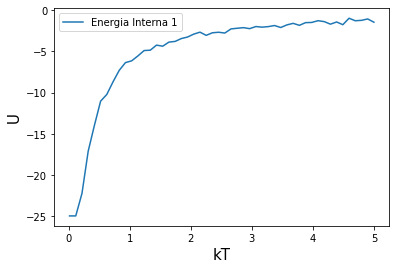

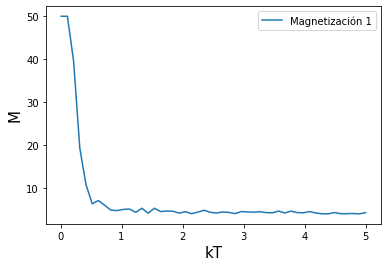

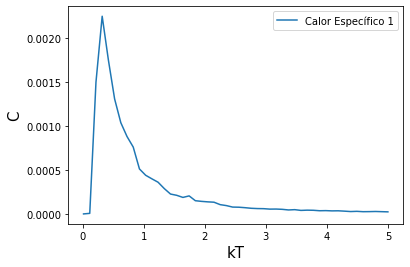

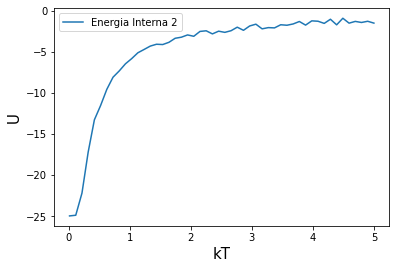

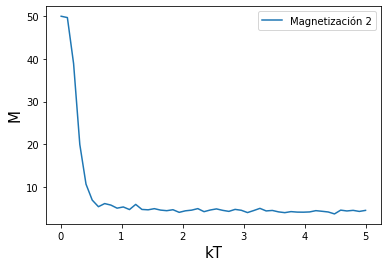

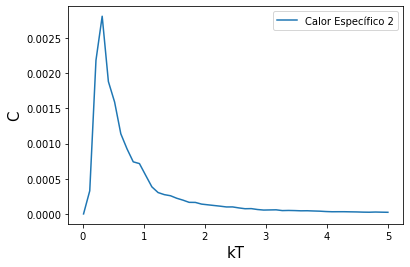

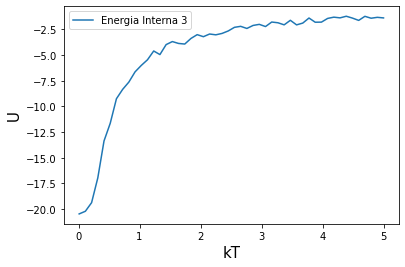

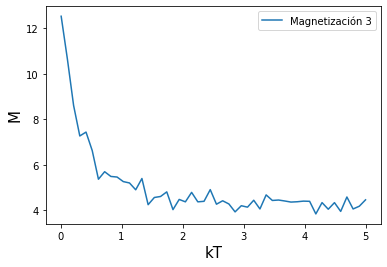

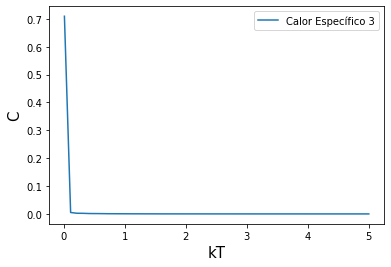

In [44]:
for i in range(3): #SE realizan las 9 graficas solicitadas. 
                    #tipo 1 son espines hacia arriba, 2 hacia abajo y 3 aleatorios
    plt.plot(temp,matrizEInt[i,:], label='Energia Interna '+str(i+1) )
    plt.ylabel('U', fontsize='15')
    plt.xlabel('kT', fontsize='15')
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(temp,matrizMagnet[i,:], label='Magnetización '+str(i+1) )
    plt.ylabel('M', fontsize='15')
    plt.xlabel('kT', fontsize='15')
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(temp,matrizCEsp[i,:], label="Calor Específico "+str(i+1) )
    plt.ylabel('C', fontsize='15')
    plt.xlabel('kT', fontsize='15')
    plt.legend(loc='best')
    plt.show()

### Solución analítica del modelo de Ising según Landau

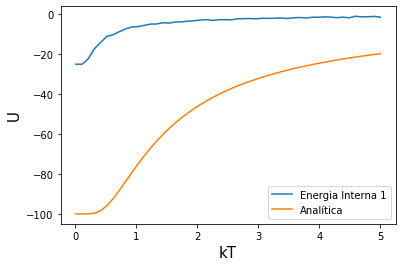

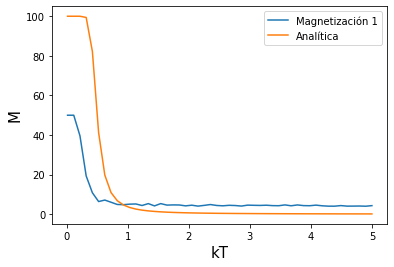

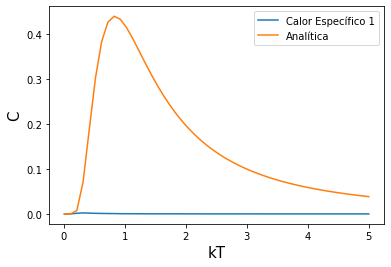

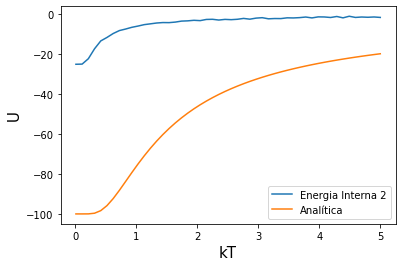

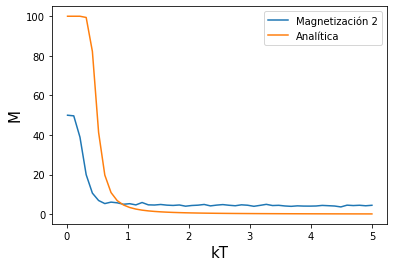

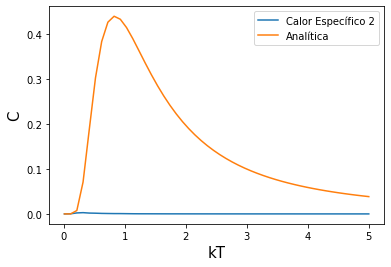

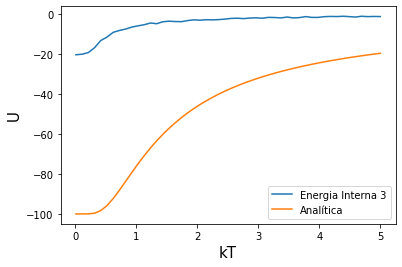

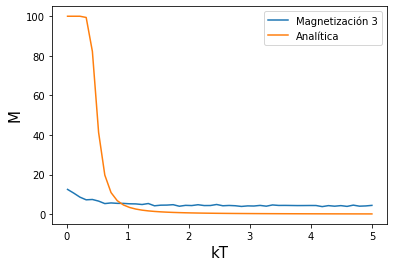

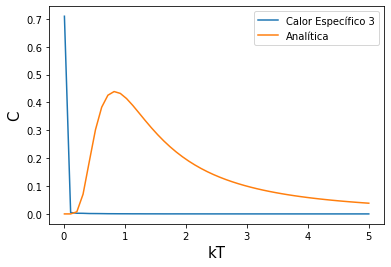

In [48]:

tempe=np.linspace(0.01, 5, 50)
def EnergiaAnalitica():
    itera=100
    energia_interna=-itera*np.tanh(1/tempe)
    return energia_interna

def MagnetAnalitica():
    itera=100
    B=0.005 #Este valor se encontró por tanteo según la aclaración del profesor
    magnet=(itera*np.exp(1/tempe)*np.sinh(B/tempe))/(np.sqrt(np.exp(2*1/tempe)*np.sinh(B/tempe)**2+np.exp(-2*1/tempe)))
    return magnet

def CalEspAnalitico():
    cea=(1/tempe)**2/np.cosh(1/tempe)**2
    return cea

for i in range(3): #SE realizan las 9 graficas solicitadas. 
                    #tipo 1 son espines hacia arriba, 2 hacia abajo y 3 aleatorios
    plt.plot(temp,matrizEInt[i,:], label='Energia Interna '+str(i+1) )
    plt.plot(tempe,EnergiaAnalitica(), label='Analítica')
    plt.ylabel('U', fontsize='15')
    plt.xlabel('kT', fontsize='15')
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(temp,matrizMagnet[i,:], label='Magnetización '+str(i+1) )
    plt.plot(tempe,MagnetAnalitica(), label='Analítica')
    plt.ylabel('M', fontsize='15')
    plt.xlabel('kT', fontsize='15')
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(temp,matrizCEsp[i,:], label="Calor Específico "+str(i+1) )
    plt.plot(tempe,CalEspAnalitico(), label='Analítica')
    plt.ylabel('C', fontsize='15')
    plt.xlabel('kT', fontsize='15')
    plt.legend(loc='best')
    plt.show()